<a href="https://colab.research.google.com/github/tarakantaacharya/CovidPneumonia-Case-study/blob/main/Copy_of_OriginalModelCovidPneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!kaggle datasets download -d prashant268/chest-xray-covid19-pneumonia

Dataset URL: https://www.kaggle.com/datasets/prashant268/chest-xray-covid19-pneumonia
License(s): unknown
 99% 2.03G/2.06G [00:39<00:00, 35.1MB/s]
100% 2.06G/2.06G [00:39<00:00, 55.6MB/s]


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/chest-xray-covid19-pneumonia.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [12]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Data/train',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Data/test',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(256,256),
)

Found 5144 files belonging to 3 classes.
Found 1288 files belonging to 3 classes.


In [13]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [4]:
# create CNN model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout, Input

model = Sequential([
    Input(shape=(256, 256, 3)),  # Input layer specifies the shape
    Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),

    Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),

    Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(3, activation='softmax')  # Change here for 3 class labels
])

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,323 (56.64 MB)

 Trainable params: 14,847,875 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [6]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'precision', 'recall'])

In [9]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [10]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',          # Metric to monitor (can be 'val_loss', 'val_accuracy', etc.)
    patience=3,                  # Number of epochs with no improvement after which training will be stopped
    verbose=1,                   # Verbosity mode (0 or 1)
    restore_best_weights=True    # Whether to restore model weights from the epoch with the best value of the monitored quantity
)

In [17]:
# Train the model
history = model.fit(
    train_ds,
    epochs=8,
    validation_data=validation_ds,
)

Epoch 1/8
161/161 ━━━━━━━━━━━━━━━━━━━━ 64s 394ms/step - accuracy: 0.9336 - loss: 0.2972 - precision: 0.9345 - recall: 0.9336 - val_accuracy: 0.2888 - val_loss: 78.3029 - val_precision: 0.2888 - val_recall: 0.2888
Epoch 2/8
161/161 ━━━━━━━━━━━━━━━━━━━━ 70s 326ms/step - accuracy: 0.9206 - loss: 0.4760 - precision: 0.9212 - recall: 0.9206 - val_accuracy: 0.9394 - val_loss: 0.2956 - val_precision: 0.9394 - val_recall: 0.9394
Epoch 3/8
161/161 ━━━━━━━━━━━━━━━━━━━━ 92s 389ms/step - accuracy: 0.9347 - loss: 0.2793 - precision: 0.9362 - recall: 0.9339 - val_accuracy: 0.9030 - val_loss: 0.4287 - val_precision: 0.9030 - val_recall: 0.9030
Epoch 4/8
161/161 ━━━━━━━━━━━━━━━━━━━━ 54s 333ms/step - accuracy: 0.9507 - loss: 0.1614 - precision: 0.9523 - recall: 0.9499 - val_accuracy: 0.9169 - val_loss: 0.4211 - val_precision: 0.9197 - val_recall: 0.9161
Epoch 5/8
161/161 ━━━━━━━━━━━━━━━━━━━━ 79s 318ms/step - accuracy: 0.9622 - loss: 0.1302 - precision: 0.9627 - recall: 0.9620 - val_accuracy: 0.7756 - v

In [18]:
# Check if the model training completed successfully.
# If it did, the history object should have recorded the metrics.
if history.history:
    print('Train accuracy:',history.history['accuracy'][-1]*100)
    print('Test accuracy:',history.history['val_accuracy'][-1]*100)
    print('Train loss:',history.history['loss'][-1])
    print('Test loss:',history.history['val_loss'][-1])
    print('Precision:',history.history['precision'][-1])
    print('Recall:',history.history['recall'][-1])
    print('Train precision:',history.history['precision'][-1])
    print('Test precision:',history.history['val_precision'][-1])
    print('Train recall:',history.history['recall'][-1])
    print('Test recall:',history.history['val_recall'][-1])
    print("Model training completed successfully.")
else:
    print("Model training did not complete successfully. Check for errors during training.")

Train accuracy: 96.92845940589905
Test accuracy: 93.09006333351135
Train loss: 0.08726757019758224
Test loss: 0.2576131522655487
Precision: 0.9694730639457703
Recall: 0.9692845940589905
Train precision: 0.9694730639457703
Test precision: 0.9316239356994629
Train recall: 0.9692845940589905
Test recall: 0.9309006333351135
Model training completed successfully.


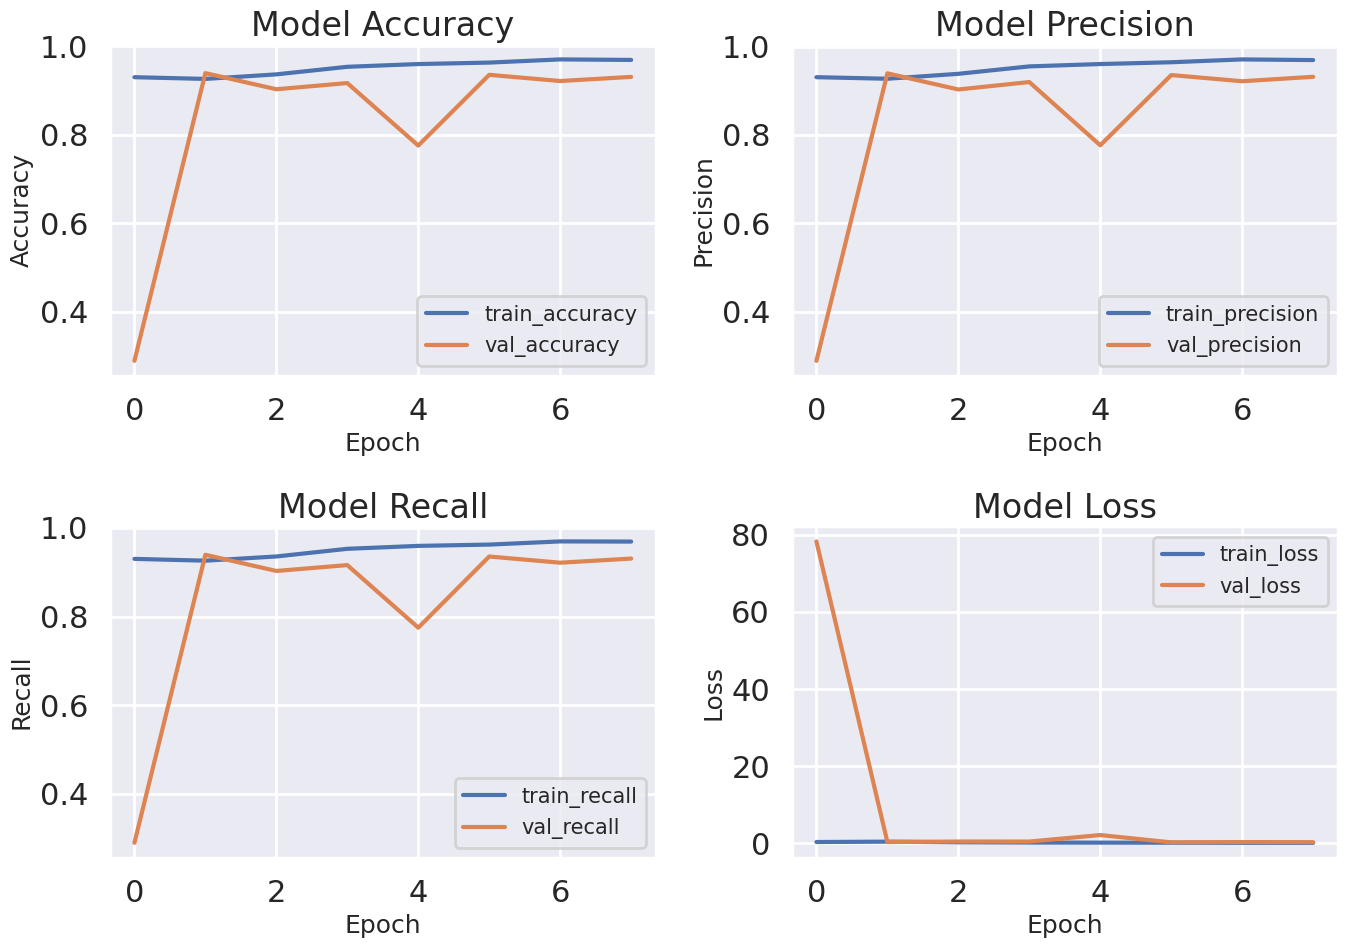

In [22]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

# Set up seaborn for styling
sns.set_theme()
sns.set_context("poster")

# Create a figure to plot all metrics
figure(figsize=(14, 10), dpi=100)

# Plot accuracy
plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.legend(loc='best',fontsize=15)

# Plot precision
if 'precision' in history.history:
    plt.subplot(2, 2, 2)
    plt.plot(history.history['precision'], label='train_precision')
    plt.plot(history.history['val_precision'], label='val_precision')
    plt.title('Model Precision')
    plt.xlabel('Epoch',fontsize=18)
    plt.ylabel('Precision',fontsize=18)
    plt.legend(loc='best',fontsize=15)

# Plot recall
if 'recall' in history.history:
    plt.subplot(2, 2, 3)
    plt.plot(history.history['recall'], label='train_recall')
    plt.plot(history.history['val_recall'], label='val_recall')
    plt.title('Model Recall')
    plt.xlabel('Epoch',fontsize=18)
    plt.ylabel('Recall',fontsize=18)
    plt.legend(loc='best',fontsize=15)

# Plot loss
plt.subplot(2, 2, 4)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch',fontsize=18)
plt.ylabel('Loss',fontsize=18)
plt.legend(loc='best',fontsize=15)

# Adjust layout and show plots
plt.tight_layout()
plt.show()


In [23]:
import cv2

In [25]:
model.save('newpathmodel3.keras')

Enter the file path:/content/COVID19(470).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
Exact Probabilities:
[[1. 0. 0.]]
Predicted Class Index:
[0]
The image is predicted to be a COVID19.


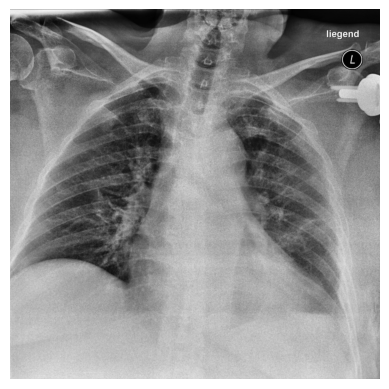

In [30]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import cv2

model = load_model('newpathmodel3.keras')

def preprocess_image(img_path, target_size):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

img_path = input('Enter the file path:')
test_img = cv2.imread(img_path)
plt.imshow(test_img)
plt.axis('off')

input_image = preprocess_image(img_path, target_size=(256, 256))

import numpy as np
# Predict the probabilities for the input image
predictions = model.predict(input_image)
print("Exact Probabilities:")
print(predictions)

# Get the class index with the highest probability
predicted_class_index = np.argmax(predictions, axis=1)
print("Predicted Class Index:")
print(predicted_class_index)

# Define the class labels
class_names = ['COVID19', 'NORMAL', 'PNEUMONIA']

# Print the predicted class label
predicted_class_label = class_names[predicted_class_index[0]]
print("The image is predicted to be a", predicted_class_label + ".")


In [28]:
import tensorflow as tf

# Load the train and test datasets
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/Data/train',
    image_size=(256, 256),
    batch_size=32
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/Data/test',
    image_size=(256, 256),
    batch_size=32
)

# Get the class names from the train dataset
# Assuming that both train and test have the same class structure
class_names = train_dataset.class_names

# Function to print the class mapping
def print_class_mapping(class_names):
    for index, class_name in enumerate(class_names):
        print(f"Class Index: {index}, Class Label: {class_name}")

# Call the function to print the class mapping
print_class_mapping(class_names)


Found 5144 files belonging to 3 classes.
Found 1288 files belonging to 3 classes.
Class Index: 0, Class Label: COVID19
Class Index: 1, Class Label: NORMAL
Class Index: 2, Class Label: PNEUMONIA
